In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Generate random input data to train on  (data)

In [2]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow  (model)

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2     #(the x and z)
output_size = 1     #(y)

#creating the model
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                   kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                   bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                  )
                                                   ])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')    # we want to use the L2-norm loss (least sum of squares)

#Indicate to the model which data to fit
# an epoch is 1 full iteration, 
#verbose=0 is 'silent' or no output about the training is displayed
#verbose=1 is 'progress bar' of the training
#verbose=2 is 'one line per epoch' of the training
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 23.7732
Epoch 2/100
32/32 - 0s - loss: 1.1934
Epoch 3/100
32/32 - 0s - loss: 0.4340
Epoch 4/100
32/32 - 0s - loss: 0.3840
Epoch 5/100
32/32 - 0s - loss: 0.3918
Epoch 6/100
32/32 - 0s - loss: 0.4026
Epoch 7/100
32/32 - 0s - loss: 0.3687
Epoch 8/100
32/32 - 0s - loss: 0.4087
Epoch 9/100
32/32 - 0s - loss: 0.3664
Epoch 10/100
32/32 - 0s - loss: 0.3641
Epoch 11/100
32/32 - 0s - loss: 0.4162
Epoch 12/100
32/32 - 0s - loss: 0.3647
Epoch 13/100
32/32 - 0s - loss: 0.4359
Epoch 14/100
32/32 - 0s - loss: 0.3629
Epoch 15/100
32/32 - 0s - loss: 0.3607
Epoch 16/100
32/32 - 0s - loss: 0.3749
Epoch 17/100
32/32 - 0s - loss: 0.3755
Epoch 18/100
32/32 - 0s - loss: 0.3556
Epoch 19/100
32/32 - 0s - loss: 0.3969
Epoch 20/100
32/32 - 0s - loss: 0.3783
Epoch 21/100
32/32 - 0s - loss: 0.3664
Epoch 22/100
32/32 - 0s - loss: 0.3728
Epoch 23/100
32/32 - 0s - loss: 0.3956
Epoch 24/100
32/32 - 0s - loss: 0.3964
Epoch 25/100
32/32 - 0s - loss: 0.3752
Epoch 26/100
32/32 - 0s - loss: 0

### Extract weights and biases

In [5]:
model.layers[0].get_weights()

[array([[ 1.9385445],
        [-2.9756315]], dtype=float32),
 array([4.9817953], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9385445],
       [-2.9756315]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9817953], dtype=float32)

##### as the weights are close to 2 and -3 and our bias is close to 5, this info confirms that our algorithm...
##### ... has learned the underlying relationship between the variables

### Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)
# these are the values that were compared to the targets to evaluate the loss function (after 100 epochs of training)

array([[ 25.5],
       [  9.6],
       [ 22. ],
       [ 14. ],
       [ -5. ],
       [-24. ],
       [ 23.6],
       [ 27.4],
       [ -5.1],
       [ 42.5],
       [-16.3],
       [ -4.3],
       [ 12.5],
       [ 21.7],
       [  9.8],
       [ 30.4],
       [-29.5],
       [  5.5],
       [ 44.6],
       [-13.6],
       [ 24.4],
       [  5.9],
       [ 18.1],
       [ 12.7],
       [  1.9],
       [-23.2],
       [-12.4],
       [  4.4],
       [-17.4],
       [ 33.5],
       [  1.8],
       [ 10.2],
       [ -6.4],
       [ 21.4],
       [ -7.1],
       [ 40.9],
       [  6.5],
       [-23. ],
       [  7.7],
       [ 11.5],
       [ -8.7],
       [ 49.8],
       [ -9.2],
       [ -0.8],
       [ -3.5],
       [ 45.7],
       [-39.3],
       [ -6.7],
       [ -6.6],
       [-11.7],
       [  2.6],
       [ 38.7],
       [  4.5],
       [-21.1],
       [ 20.9],
       [-31.9],
       [ 24.4],
       [ 19.9],
       [ 14.2],
       [  3.2],
       [-27.5],
       [ 20.9],
       [

In [9]:
training_data['targets'].round(1)

array([[ 26.4],
       [  9.5],
       [ 22.6],
       [ 15.2],
       [ -5.9],
       [-24.6],
       [ 23.1],
       [ 28.7],
       [ -4.8],
       [ 43.6],
       [-15.9],
       [ -3.8],
       [ 11.5],
       [ 22.8],
       [  9.5],
       [ 31.4],
       [-30.1],
       [  4.4],
       [ 45.3],
       [-13.4],
       [ 24.7],
       [  6.2],
       [ 17.4],
       [ 12.3],
       [  2. ],
       [-22.5],
       [-12.6],
       [  4.7],
       [-16.6],
       [ 34.1],
       [  0.9],
       [ 10.2],
       [ -5.7],
       [ 20.9],
       [ -7. ],
       [ 42.3],
       [  6.1],
       [-22.8],
       [  7.3],
       [ 11.3],
       [ -9.9],
       [ 51.1],
       [ -8.6],
       [ -1.4],
       [ -3.3],
       [ 45.5],
       [-39.5],
       [ -6.6],
       [ -6.8],
       [-11.4],
       [  2.5],
       [ 40.1],
       [  4.3],
       [-22.4],
       [ 20.4],
       [-32.3],
       [ 24.5],
       [ 19.5],
       [ 14.2],
       [  3.5],
       [-27.3],
       [ 21. ],
       [

### Plotting the data

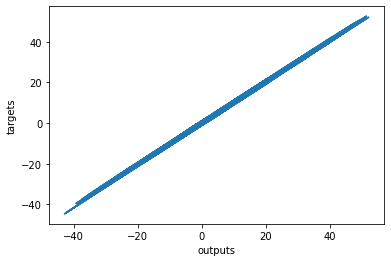

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
# the line should be as close to 45 degrees as possible